### 전처리 : preprocessing
- 데이터 분석을 하기 위해 데이터를 전=ㅇ리하는 방법
- 문제정의 -> 데이터 수집 -> 데이터 처리(pandas) -> 데이터 분석 (모델링) -> 결론
- index
    - 결측데이터 검색
    - 결측데이터 처리
    - 스케일링 빛 변화
    - 범주형 -> 수치형

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("preprocessing datas/preprocessing.csv")
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [3]:
df.isna() #isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False


In [4]:
df.isna().sum()

x1    2
x2    3
x3    2
x4    1
x5    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      4 non-null      float64
 2   x3      5 non-null      float64
 3   x4      6 non-null      object 
 4   x5      7 non-null      object 
dtypes: float64(3), object(2)
memory usage: 408.0+ bytes


In [6]:
# mssingno package : pip install missingno 결측 데이터 시각화

In [7]:
!pip install missingno

In [8]:
import missingno as msno

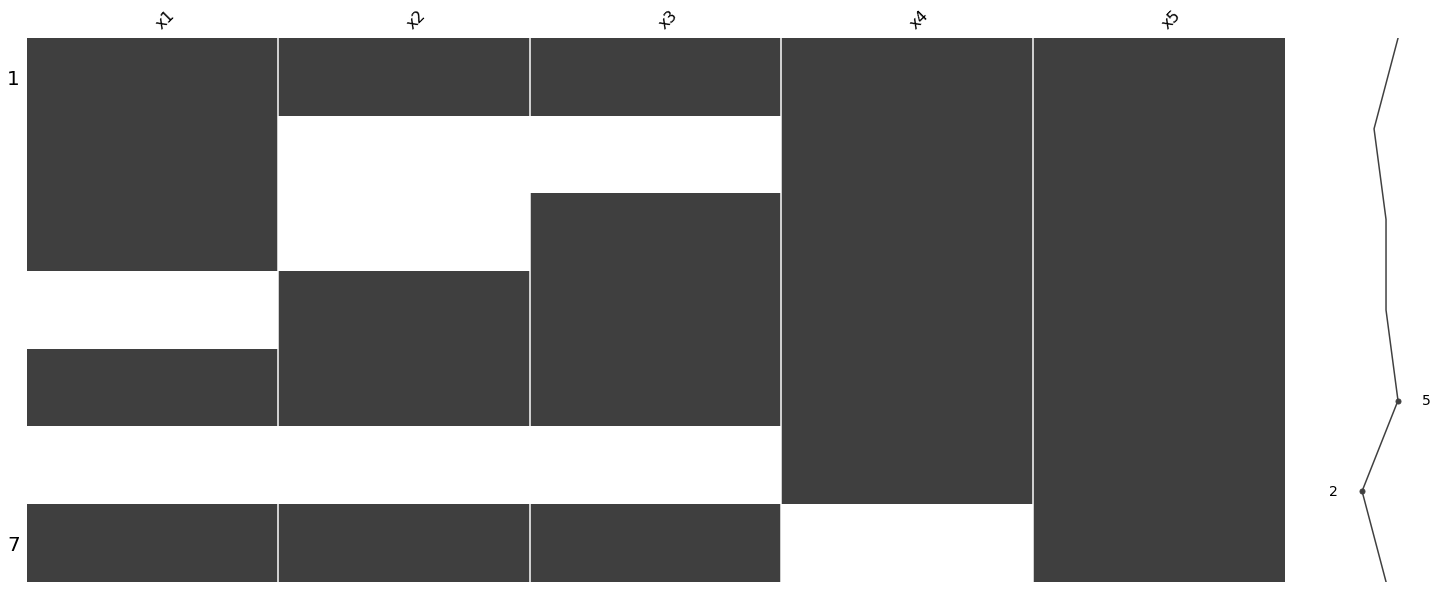

In [9]:
msno.matrix(df) #하얀 부분이 결측 데이터. 뒤에 줄은 row 데이터. 짖그재그가 심할수록 결측 데이터 많다는 것

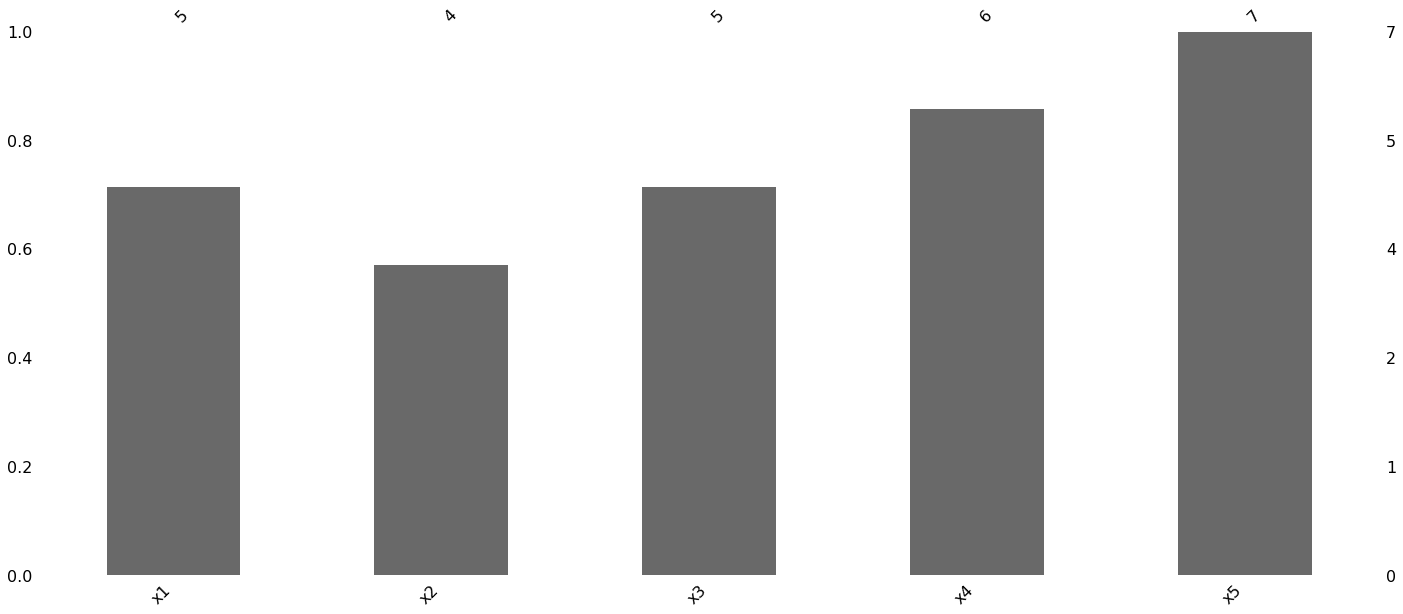

In [10]:
msno.bar(df)

In [11]:
titanic_df = pd.read_csv("preprocessing datas/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


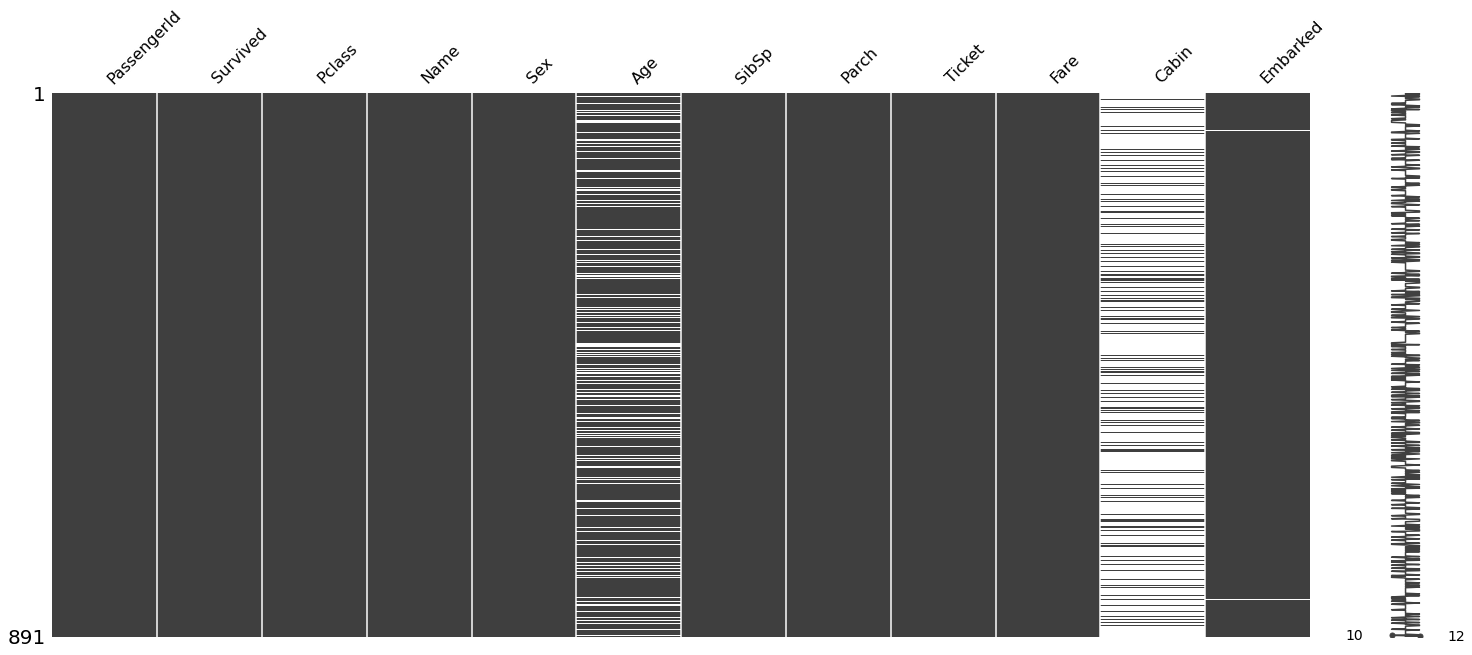

In [12]:
msno.matrix(titanic_df)

In [13]:
# 컬럼의 데이터가 20% 이상 없으면 컬럼 삭제

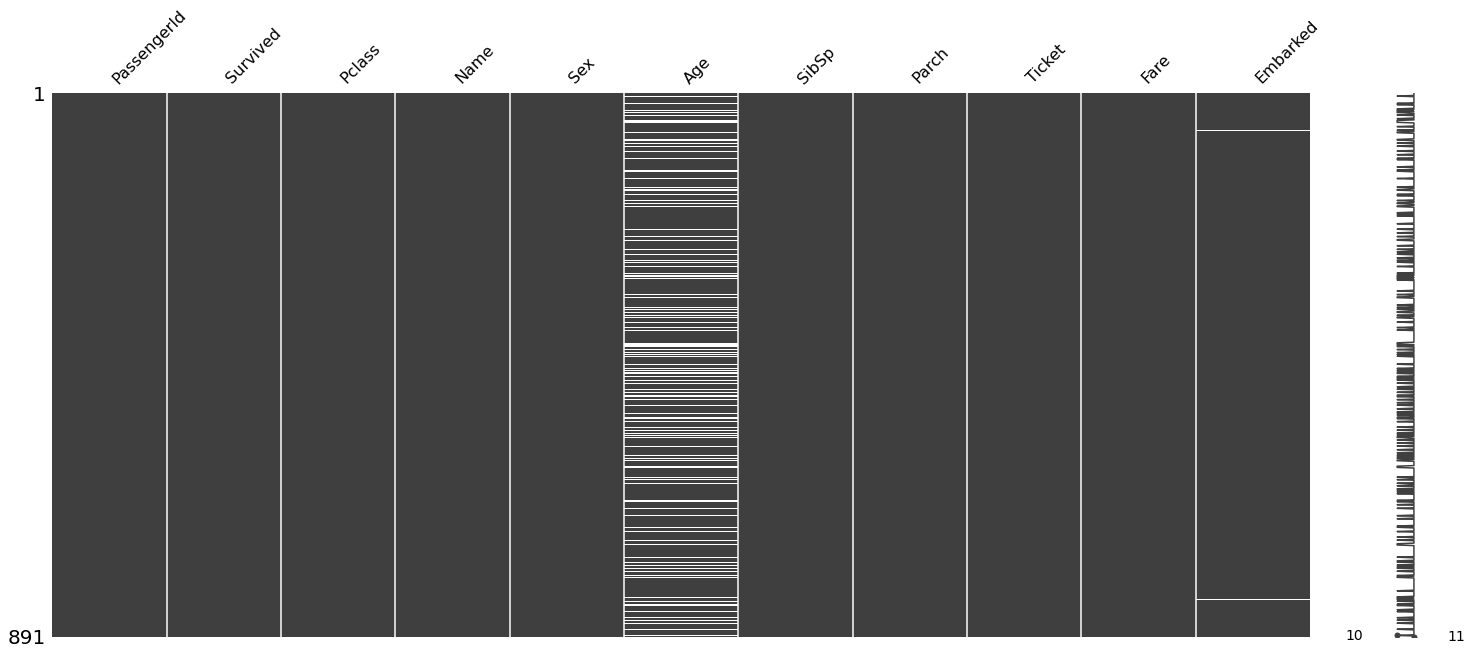

In [14]:
result_df = titanic_df.dropna(thresh=int(len(titanic_df) * 0.8), axis=1) #데이터가 80% 이상 있는 컬럼만 남기기
msno.matrix(result_df)

In [15]:
# 수치형 데이터는 평균값이나 중앙값 채워줌

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd

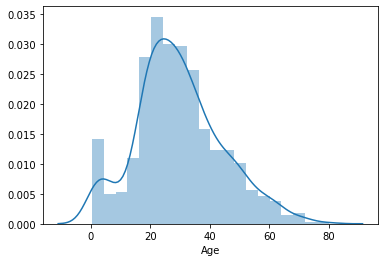

In [17]:
sns.distplot(result_df.Age)

In [18]:
notnull_age = result_df[result_df["Age"].notnull()]["Age"]
median_age = np.median(notnull_age)
median_age

28.0

In [19]:
import warnings
warnings.simplefilter("ignore")

In [20]:
result_df["Age"][result_df["Age"].isnull()] = median_age
result_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


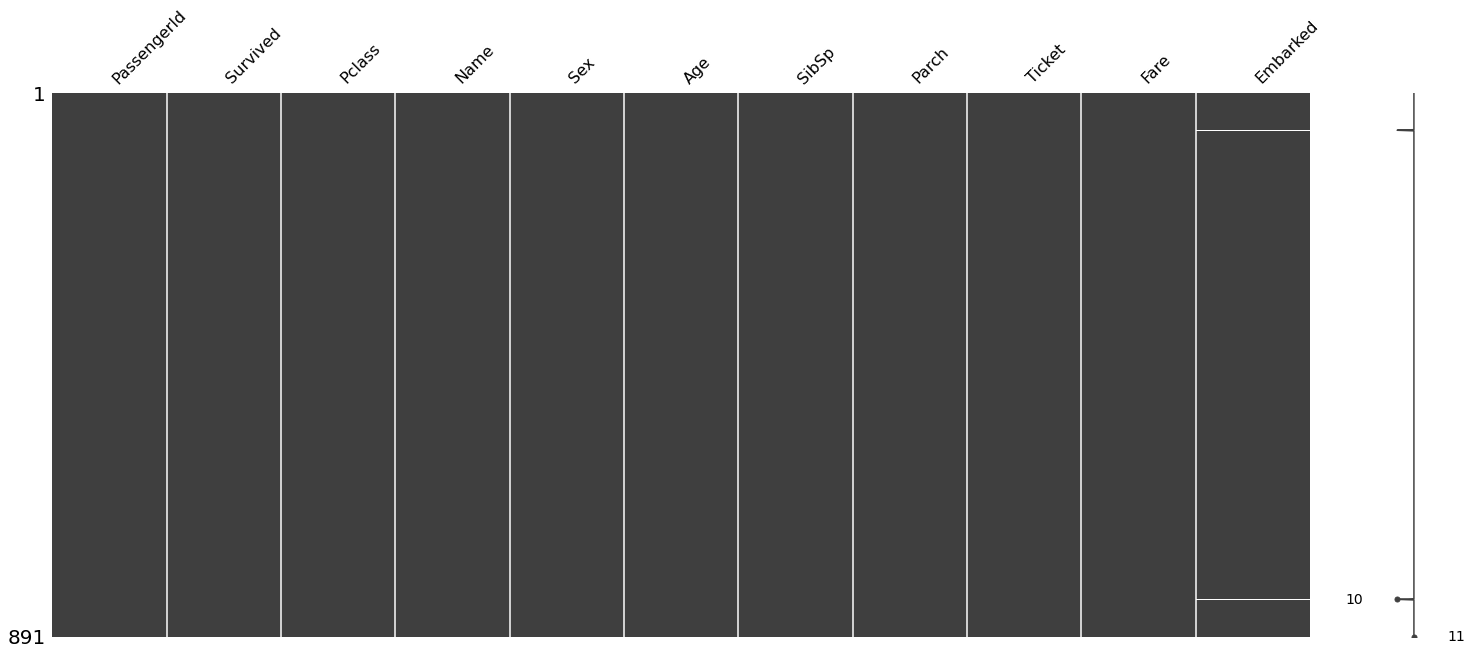

In [21]:
msno.matrix(result_df)

In [22]:
embarked_data = result_df["Embarked"]

In [23]:
embarked_data.iloc[np.argmax(embarked_data.value_counts())]

'S'

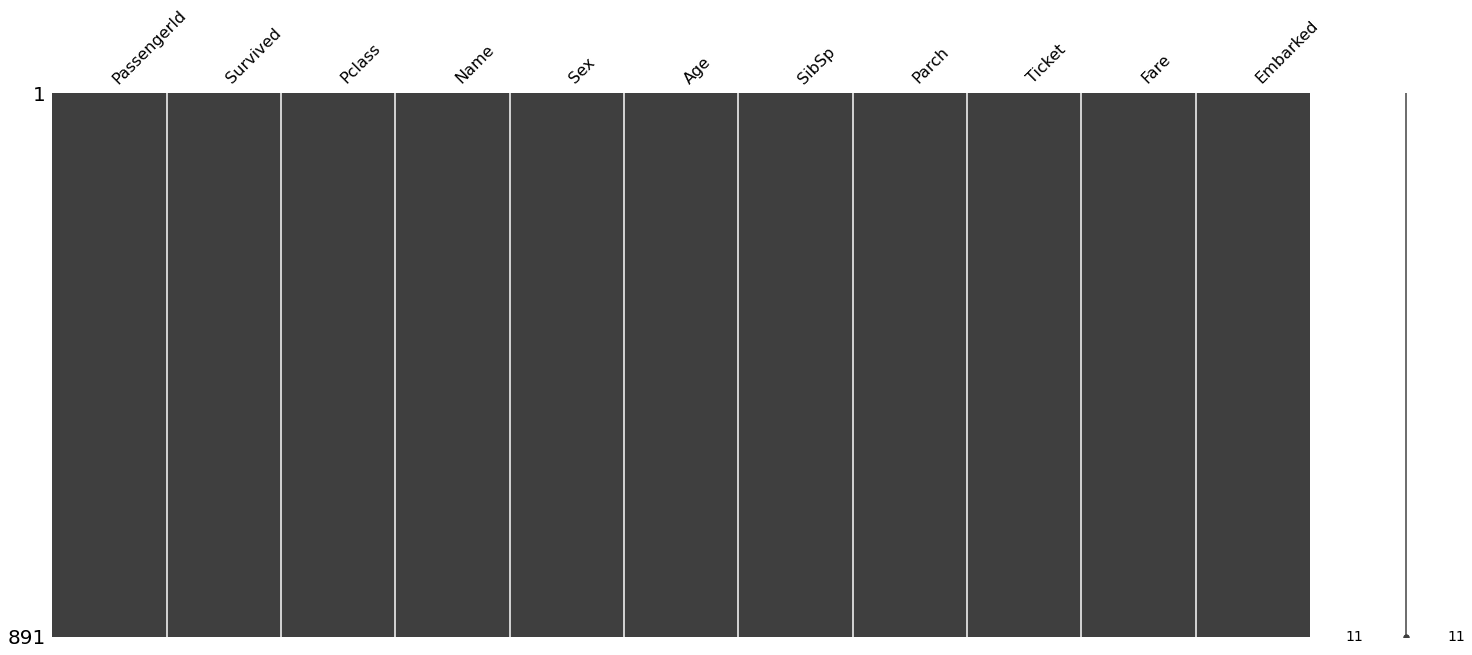

In [24]:
result_df["Embarked"][result_df["Embarked"].isnull()] = embarked_data.iloc[np.argmax(embarked_data.value_counts())]
msno.matrix(result_df)

In [25]:
df_1 = result_df[["Pclass", "Age",  "SibSp", "Parch", "Fare", "Survived"]]
df_1.tail(2)

,Pclass,Age,SibSp,Parch,Fare,Survived
889,1,26.0,0,0,30.00,1
890,3,32.0,0,0,7.75,0


In [26]:
#범주현 데이터를 원핫인코딩으로 전처리

In [27]:
df_2 = result_df[["Pclass", "Age",  "SibSp", "Parch", "Fare", "Sex", "Embarked", "Survived"]]
oh_sex = pd.get_dummies(df_2["Sex"])
oh_embarked = pd.get_dummies(df_2["Embarked"])
df_2 = pd.concat([df_2, oh_sex, oh_embarked], axis=1)
df_2.drop(columns=["Sex", "Embarked"], inplace=True)
df_2 = df_2[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S', 'Survived']]
df_2.tail(2)

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Survived
889,1,26.0,0,0,30.00,0,1,1,0,0,1
890,3,32.0,0,0,7.75,0,1,0,1,0,0


In [28]:
#데이터셋 분리

In [29]:
from sklearn.model_selection import train_test_split

In [35]:
df_x = df_2.drop(columns=["Survived"])
df_y = df_2["Survived"]

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=1) #test size 20%로 지정, random state = seed

In [36]:
len(train_x), len(test_x)

(712, 179)

In [31]:
#모델학습

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [42]:
model = DecisionTreeClassifier().fit(train_x, train_y)
# model = SVC(probability=True).fit(train_x, train_y)

In [43]:
pred_y = model.predict(test_x)
pred_y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [44]:
np.array(test_y)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [45]:
len(pred_y[pred_y == np.array(test_y)]) / len(np.array(test_y))

0.776536312849162

In [46]:
model.score(test_x, test_y)

0.776536312849162

In [47]:
model.predict(test_x[:2])

array([1, 0], dtype=int64)